## Возрастной шаблон посетителей сайта

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

Данные

In [2]:
df = pd.read_csv('../../data/age_spend.csv')
df.head()

,spend,age
0,2725.0,20.0
1,3010.0,38.0
2,2782.0,25.0
3,2809.0,31.0
4,2774.0,54.0


In [3]:
X = df[['age']]
y = df['spend']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

Дерево решений для 2-х параметров

In [5]:
max2_tree_model = DecisionTreeRegressor(max_depth=2)
max2_tree_model.fit(X_train, y_train)

max5_tree_model = DecisionTreeRegressor(max_depth=5)
max5_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

Модель линейной регрессии

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

RSME

Дерево, с глубиной 5, получило меньшую ошибку из всех

In [7]:
linear_predictions = model.predict(X_test)
print(f'Linear model RMSE: {mean_squared_error(linear_predictions, y_test)**0.5}')
 
max2_tree_predictions = max2_tree_model.predict(X_test)
print(f'Tree with max depth of 2 RMSE: {mean_squared_error(max2_tree_predictions, y_test)**0.5}')
 
max5_tree_predictions = max5_tree_model.predict(X_test)
print(f'tree with max depth of 5 RMSE: {mean_squared_error(max5_tree_predictions, y_test)**0.5}')

Linear model RMSE: 159.07639273785358
Tree with max depth of 2 RMSE: 125.1920405443602
tree with max depth of 5 RMSE: 109.73376798374653


DF с возрастом для прогнозов

In [8]:
ages = pd.DataFrame({'age': range(18, 70)})

Прогноз LinearRegression

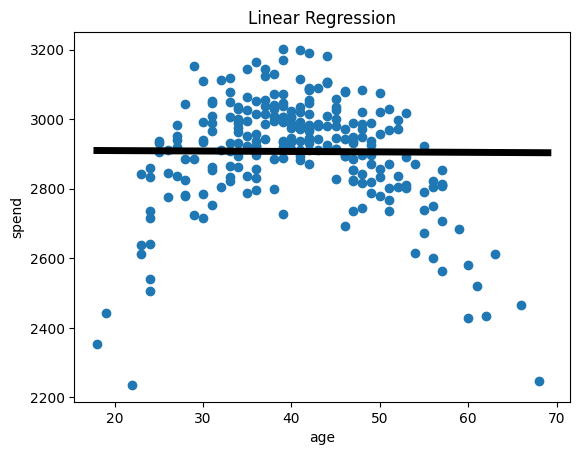

In [14]:
plt.scatter(X_test, y_test)
plt.plot(ages, model.predict(ages), color='k', linewidth=5)
plt.xlabel("age")
plt.ylabel("spend")
plt.title("Linear Regression")
plt.show()

Прогноз дерева с глубиной 2

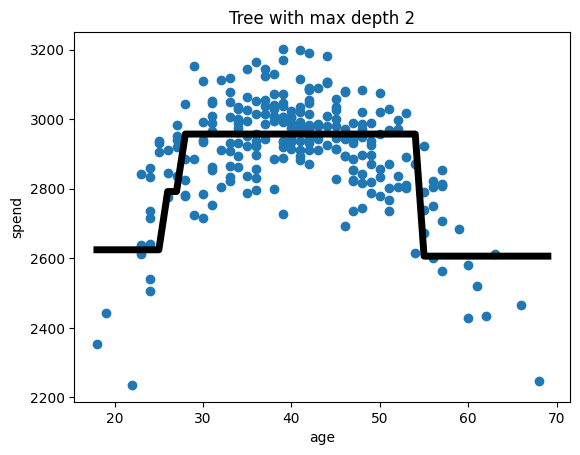

In [13]:
plt.scatter(X_test, y_test)
plt.plot(ages, max2_tree_model.predict(ages), color='k', linewidth=5)
plt.xlabel("age")
plt.ylabel("spend")
plt.title("Tree with max depth 2")
plt.show()

Прогноз дерева с глубиной 5

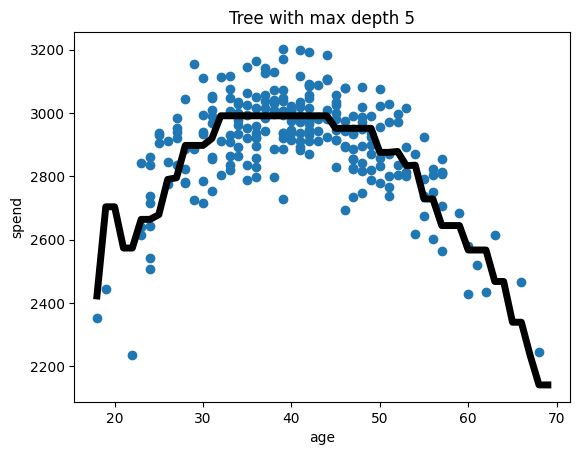

In [15]:
plt.scatter(X_test, y_test)
plt.plot(ages, max5_tree_model.predict(ages), color='k', linewidth=5)
plt.xlabel("age")
plt.ylabel("spend")
plt.title("Tree with max depth 5")
plt.show()

Случайный лес

In [17]:
max2_forest_model = RandomForestRegressor(max_depth=2, random_state=10)
max2_forest_model.fit(X_train, y_train)
 
max5_forest_model = RandomForestRegressor(max_depth=5, random_state=10)
max5_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=10)

RSME для случайных лесов

Случайный лес работает лучше, чем дерево решенийи. Все деревья работаю лучше, чем линейная регрессия.

In [18]:
max2_forest_predictions = max2_forest_model.predict(X_test)
print(f'Max depth of 2 RMSE: {mean_squared_error(max2_forest_predictions, y_test)**0.5}')
 
max5_forest_predictions = max5_forest_model.predict(X_test)
print(f'Max depth of 5 RMSE: {mean_squared_error(max5_forest_predictions, y_test)**0.5}')

Max depth of 2 RMSE: 116.57417072810561
Max depth of 5 RMSE: 109.05510027963649


Прогноз случайного леса с глубиной 2

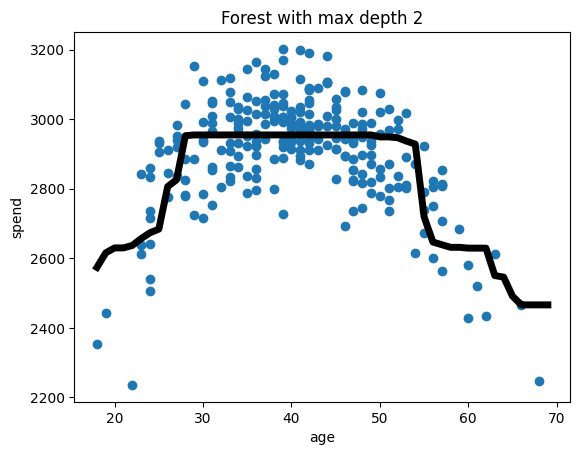

In [19]:
plt.scatter(X_test, y_test)
plt.plot(ages, max2_forest_model.predict(ages), color='k', linewidth=5)
plt.xlabel("age")
plt.ylabel("spend")
plt.title("Forest with max depth 2")
plt.show()

Прогноз случайного леса с глубиной 5

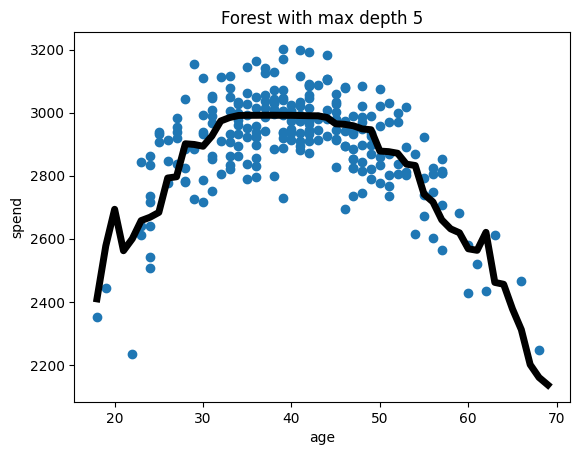

In [20]:
plt.scatter(X_test, y_test)
plt.plot(ages, max5_forest_model.predict(ages), color='k', linewidth=5)
plt.xlabel("age")
plt.ylabel("spend")
plt.title("Forest with max depth 5")
plt.show()

Общий график

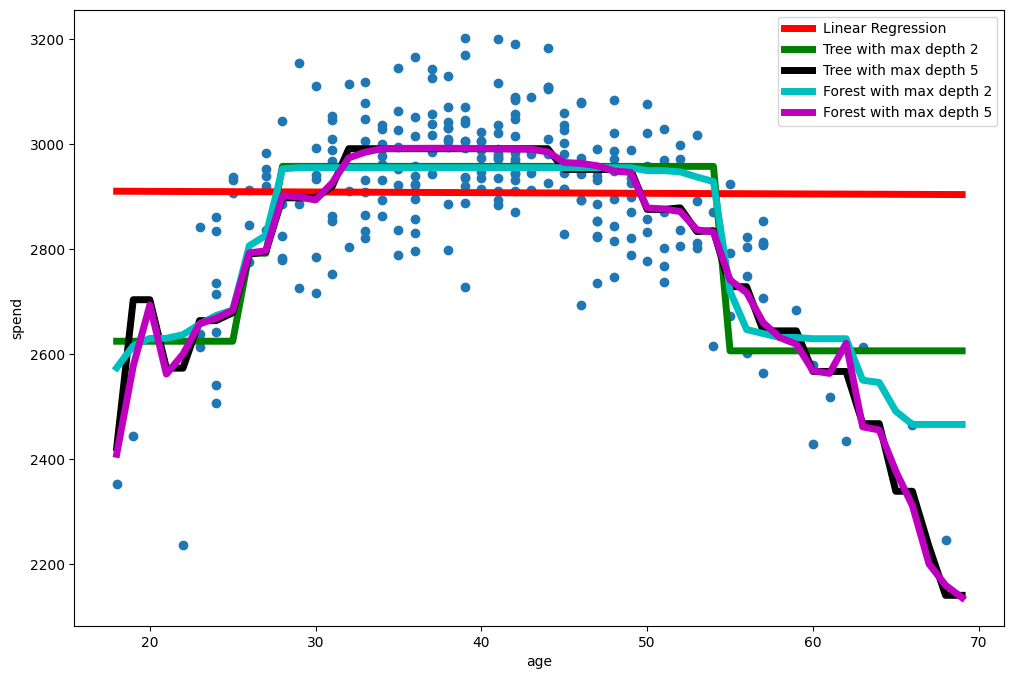

In [22]:
plt.figure(figsize=(12, 8))
plt.scatter(X_test, y_test)
plt.plot(ages, model.predict(ages), color='r',
         linewidth=5, label="Linear Regression")
plt.plot(ages, max2_tree_model.predict(ages), color='g',
         linewidth=5, label="Tree with max depth 2")
plt.plot(ages, max5_tree_model.predict(ages), color='k',
         linewidth=5, label="Tree with max depth 5")
plt.plot(ages, max2_forest_model.predict(ages), color='c',
         linewidth=5, label="Forest with max depth 2")
plt.plot(ages, max5_forest_model.predict(ages), color='m',
         linewidth=5, label="Forest with max depth 5")
plt.legend()
plt.xlabel("age")
plt.ylabel("spend")
plt.show()
